# K-means Clustering

**Task**:  To get insights into customer behaviour and preferences by using K-means clustering. The data set used for this included purchasing behaviour. 

CLustering the customers based on their spending using k-means clustering algorithm, and then interpret the resulting clusters to gain insights into the purchasing behavior. 


The [Custemorpersonality](Dataset/marketing_campaign.csv) is a dataset of customer spending for two years spending data. This analysis helps in reconginizing the company's ideal costumer. This would help busineses understand cosutmers and make them modify the deals and products for specific needs.  



In [10]:
#import liabraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings

warnings.filterwarnings('ignore')

In [25]:
#import data
data = pd.read_csv("/Users/vinodk/Documents/Rice Univeristy/4th semster/Data Science and ML /INDE 577 Repository/Data-Science-and-Machine-Learning-INDE-577---Spring-2024-/Unsupervised Learning/1_K_means_Clustering/Dataset/marketing_campaign.csv", sep='\t')
data.head

<bound method NDFrame.head of          ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012      

In [27]:
#Explore the Data
print(data.head()) #View the first few rows of the data 

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

In [29]:
#Get information about the data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [30]:
# Get Summmary statistics of the data 
print(data.describe())

                 ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000  

In [31]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

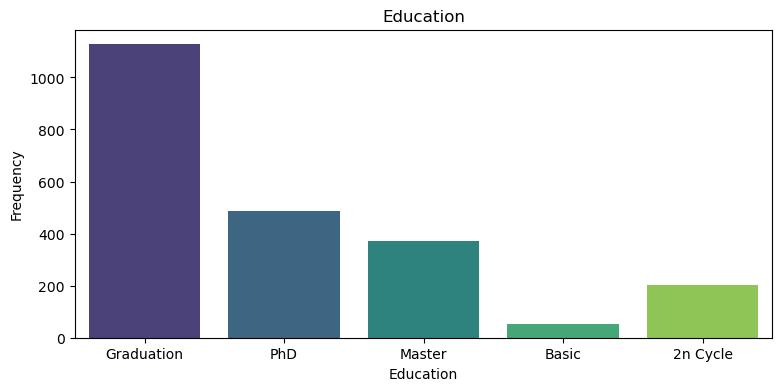

In [32]:
# Visulize the data
plt.figure(figsize=(9, 4))
sns.countplot(x="Education", data=data, palette="viridis")
plt.ylabel("Frequency")
plt.title("Education")
plt.show()

## Interpreting the graph, we see that the majority of customers in our dataset are university graduates (shown by the black bar). We also see that approximately 500 people in our dataset are PhDs and 200 are masters graduates.

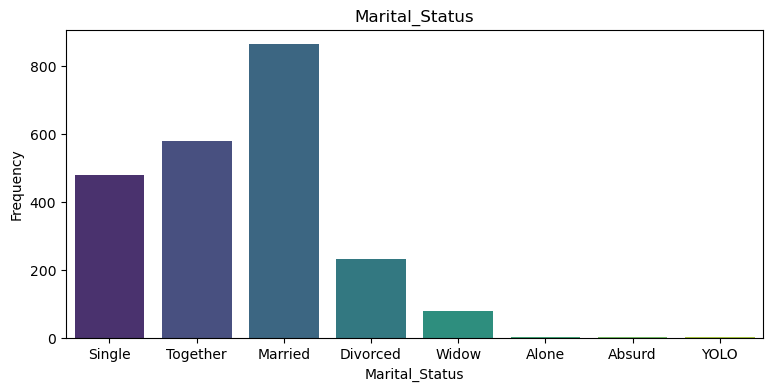

Marital_Status:
Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


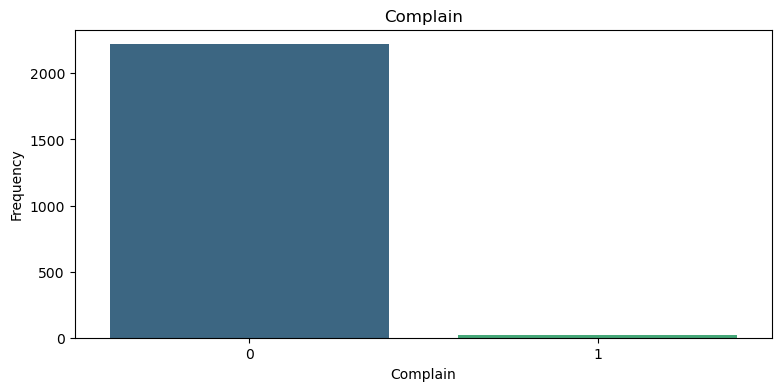

Complain:
Complain
0    2219
1      21
Name: count, dtype: int64


In [34]:
def bar_plot(feature):
    plt.figure(figsize=(9, 4))
    
    sns.countplot(x=feature, data=data, palette="viridis")
    
    plt.ylabel("Frequency")
    plt.title(feature)
    plt.show()
    
    varV = data[feature].value_counts()
    print(f"{feature}:\n{varV}")

categorical_variables = ["Marital_Status", "Complain"]

for variable in categorical_variables:
    bar_plot(variable)

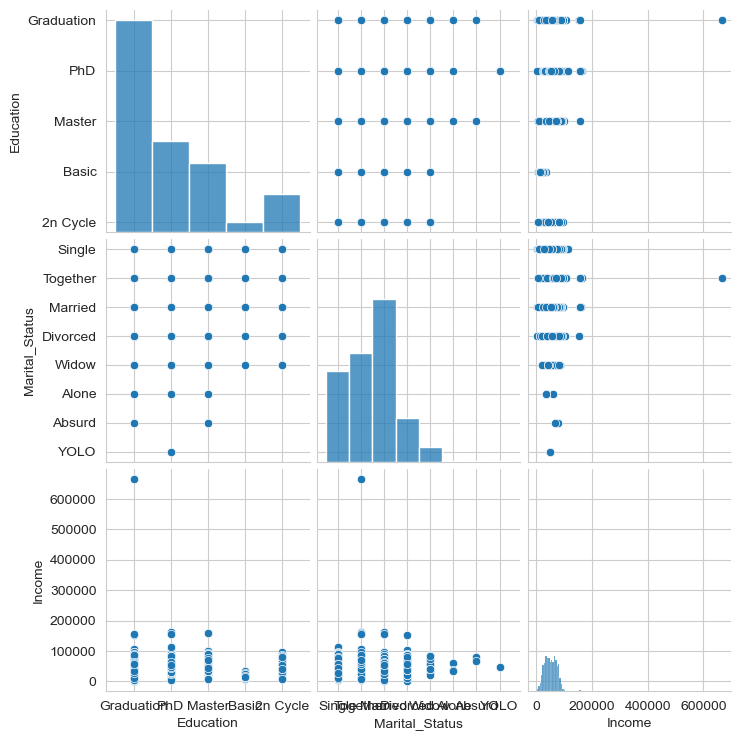

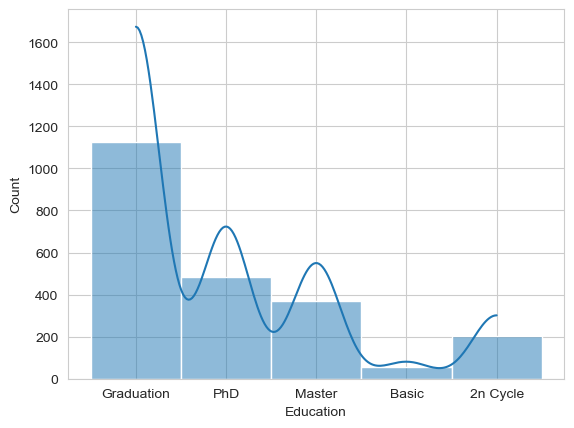

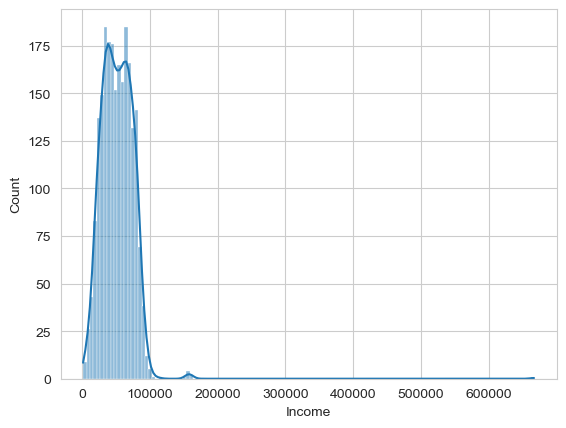

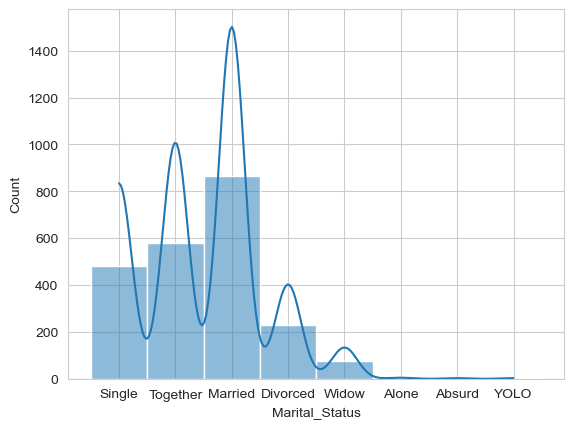

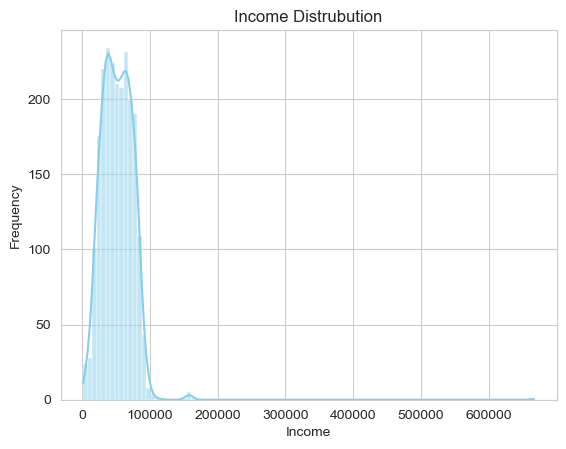

In [50]:
#Visualize the data 
sns.set_style('whitegrid')
sns.pairplot(data, vars=['Education', 'Marital_Status', 'Income'])
plt.show()

sns.histplot(data, x='Education', kde=True)
plt.show()

sns.histplot(data, x='Income', kde=True)
plt.show()

sns.histplot(data, x='Marital_Status', kde=True)
plt.show()

sns.histplot(data["Income"], bins=100, kde=True, color= 'skyblue')
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.title("Income Distrubution")
plt.show()

As we can see in the graph above, the vast majority of people in our dataset have annual incomes between 0 and 100,000 USD. A small portion have incomes around 150,000 USD, and a few people have incomes around 700,000 USD. In later sections, we will obtain cleaner, more understandable graphs after removing outliers from our dataset.

But simply looking at this graph, we can draw the following conclusions.

The vast majority of people in our dataset have incomes between 0 and 100,000 USD. The average income of people in our dataset is around 50,000 USD.

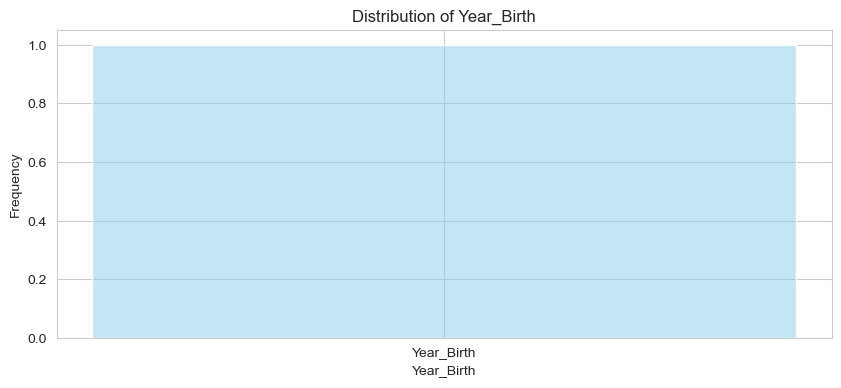

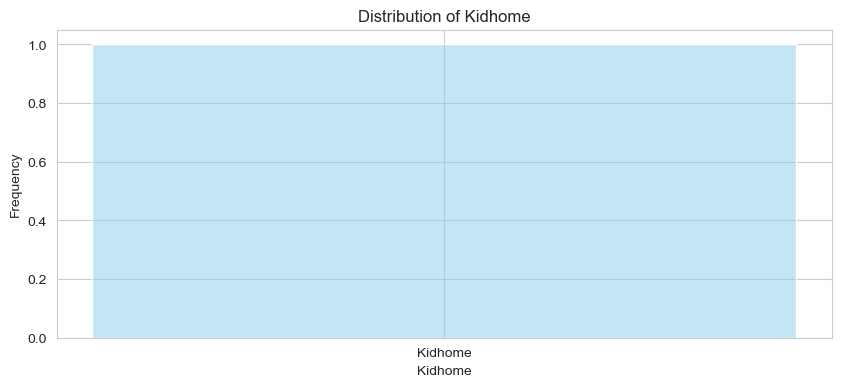

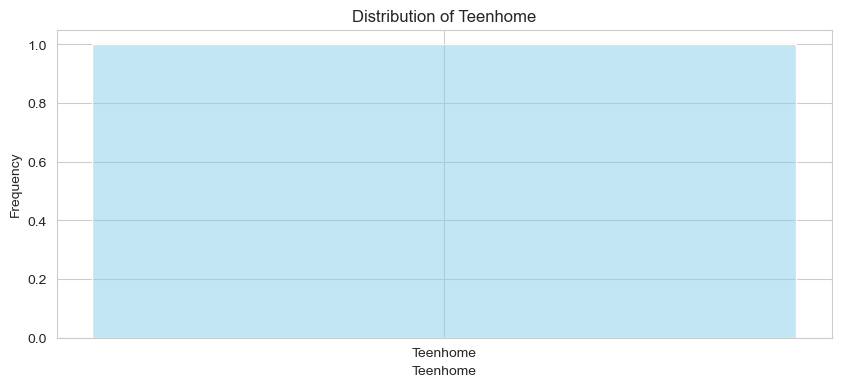

In [55]:
def plot_hist(feature):
    plt.figure(figsize=(10, 4))
    sns.histplot(data=[feature], bins=100, kde=True, color='skyblue')
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {feature}")
    plt.show()

numeric_variables = ["Year_Birth", "Kidhome", "Teenhome"]

for variable in numeric_variables:
    plot_hist(variable)